## Introduction to Machine Learning  

## Assignment 8: Linear Models

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).

### Assignment Learning Goals:

By the end of the module, students are expected to:

- Explain the general intuition behind linear models.
- Explain the `fit` and `predict` paradigm of linear models.
- Use `scikit-learn`'s `LogisticRegression` classifier.
    - Use `fit`, `predict` and `predict_proba`.   
    - Use `coef_` to interpret the model weights.
- Explain the advantages and limitations of linear classifiers. 
- Apply scikit-learn regression model (e.g., Ridge) to regression problems.
- Relate the Ridge hyperparameter `alpha` to the `LogisticRegression` hyperparameter `C`.


This assignment covers [Module 8](https://ml-learn.mds.ubc.ca/en/module8) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [2]:
# Import libraries needed for this lab
from hashlib import sha1

import altair as alt
import graphviz
import numpy as np
import pandas as pd
import string
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC, SVR

from scipy.stats import lognorm, loguniform, randint

import test_assignment8 as t
#alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# 1. Sentiment analysis on the IMDB dataset 

<img src="https://ia.media-imdb.com/images/M/MV5BMTk3ODA4Mjc0NF5BMl5BcG5nXkFtZTgwNDc1MzQ2OTE@._V1_.png"  width = "40%" alt="404 image" />

In this exercise, you will carry out sentiment analysis on a real corpus, [the IMDB movie review dataset](https://www.kaggle.com/utathya/imdb-review-dataset).
The starter code below loads the data CSV file (assuming that it's in the data directory) as a pandas DataFrame called `imdb_df`.

We have done a bit of preprocessing on the dataset and we will use the train/test split that's already provided.

In [3]:
imdb_df = pd.read_csv("data/imdb_speed.csv")
train_df = imdb_df[imdb_df['type'] == "train"]
test_df = imdb_df[imdb_df['type'] == "test"]
train_df.head()

,type,review,label
0,train,The world is facing imminent destruction and a...,neg
1,train,What a horrible comedy. Totally lame. The supp...,neg
2,train,"Follow-up to 1973's far better ""Cleopatra Jone...",neg
3,train,"It was the Sixties, and anyone with long hair ...",neg
4,train,this movie begins with an ordinary funeral... ...,neg


**Question 1.1** <br> {points: 1}  

Let's now separate our feature vectors from the target.

Use the column `review` as your `X` and the `label` column as your target `y`. 

You will need to do this for both `train_df` and `test_df`.

Save the results in objects named `X_train`, `y_train`, `X_test` and `y_test`. 

(Makes sure that all 4 of these objects are of type Pandas Series. We will be using `CountVectorizer` for future questions and this transformation requires an input of Pandas Series)

In [4]:
X_train = train_df.loc[:,'review']
y_train = train_df.loc[:,'label']
X_test = test_df.loc[:,'review']
y_test = test_df.loc[:,'label']

In [5]:
t.test_1_1(X_train,y_train,X_test,y_test)

'Success'

**Question 1.2** <br> {points: 1}  

What is the distribution of target values (`label`) in the train split? Your answer should be of type Pandas Series and saved in an object named `class_dist`.

In [6]:
class_dist = train_df.groupby('label').size() 

In [7]:
t.test_1_2(class_dist)

'Success'

**Question 1.3** <br> {points: 1}  

Do any of your columns have any null values? 

A) Yes

B) No

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer1_3`.*

In [8]:
answer1_3 = 'B'
answer1_3

'B'

In [9]:
t.test_1_3(answer1_3)

'Success'

**Question 1.4** <br> {points: 2}  

***Challenge question!***

How many words are present in each review? 

Add a column `review_wordcount` to the `train_df` dataframe and save this new dataframe as an object named `review_length_df`.


In [10]:
review_length_df = train_df.assign(review_wordcount = train_df['review'].apply(str.split).apply(len))

In [11]:
t.test_1_4(review_length_df)

'Success'

**Question 1.5** <br> {points: 3}  

What is the average word count for each review label (pos and neg)?

Save the average negative label word count and the average positive label word count to the nearest full number in objects named `neg_wc_avg` and `pos_wc_avg` respectively.

In [12]:
neg_wc_avg = review_length_df[review_length_df['label']=='neg']['review_wordcount'].mean().round()
pos_wc_avg = review_length_df[review_length_df['label']=='pos']['review_wordcount'].mean().round()
print('Negative word count avg.:', neg_wc_avg,'   Positive word count avg.:',pos_wc_avg)

Negative word count avg.: 234.0    Positive word count avg.: 238.0


In [13]:
# check that the variable exists
assert 'neg_wc_avg' in globals(
), "Please make sure that your solution is named 'neg_wc_avg'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

In [14]:
t.test_1_5_2(pos_wc_avg)

'Success'

**Question 1.6** <br> {points: 2}  

Plot the average review wordcount per label in a bar chart. 

Save the plot in an object named `plot_avg_wc`.

Remember to provide a title to your plot as well.

*Hint: remember you can plot `groupby` objects and when you do so, you'll need to reset your index.*

In [15]:
plot_df = review_length_df.groupby('label').mean().round().astype('int').reset_index()
plot_avg_wc = alt.Chart(plot_df, width = 350).mark_bar().encode(x = alt.X('label'), y = alt.Y('review_wordcount'))
plot_avg_wc

alt.Chart(...)

In [16]:
t.test_1_6(plot_avg_wc)

'Success'

**Question 1.7** <br> {points: 1}  

Let's make a baseline model using `DummyClassifier`.

Build a `DummyClassifier` named `dummy` using `strategy='most_frequent'`. Perform cross-validation on the training portion. Make sure that you return the training score using `return_train_score=True`. 

Save the results in a dataframe named `dummy_scores`.

In [17]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy_scores = pd.DataFrame(cross_validate(dummy, X_train, y_train, return_train_score = True))

In [18]:
t.test_1_7(dummy_scores)

'Success'

**Question 1.8** <br> {points: 0}

Import `CountVectorizer` and `LogisticRegression`.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [20]:
t.test_1_8()

'Success'

**Question 1.9** <br> {points: 1}  

Build a pipeline named `lr_pipe` that uses the `CountVectorizer()` transformer followed by the logistic regression model (set `max_iter=2000` this will help avoid any warnings).

Perform 5 fold cross-validation on the training set using `lr_pipe` and return the training score. Save the results in a dataframe named `lr_scores`.

In [22]:
lr_pipe = make_pipeline(CountVectorizer(max_features=100), LogisticRegression(max_iter = 2000))
lr_scores = pd.DataFrame(cross_validate(lr_pipe, X_train, y_train, cv = 5, return_train_score = True))

In [23]:
t.test_1_9(lr_pipe,lr_scores)

'Success'

**Question 1.10** <br> {points: 1} 

What is the mean of each column in `lr_scores`?

Save your result in an object named `lr_mean`. 

In [24]:
lr_mean = lr_scores.mean()

In [25]:
t.test_1_10(lr_mean)

'Success'

**Question 1.11** <br> {points: 1}  

Which model performs better? 

A) `DummyClassifier`

B) `LogisticRegression`

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer1_11`.*

In [26]:
answer1_11 = 'B'

In [27]:
t.test_1_11(answer1_11)

'Success'

**Question 1.12** <br> {points: 2} 

Let's see if we can optimize our model by hyperparameter tuning both `max_features` and `C`. 

First, let's answer the following questions. 

i) Does `max_features` correspond to a hyperparameter for `CountVectorizer` or `LogisticRegression`? Answer the name in an object named `max_f_hyper`.

ii) Does `C` correspond to a hyperparameter for `CountVectorizer` or `LogisticRegression`? Answer the name in an object named `C_hyper`.

*Answer in the cell below by specifying either "CountVectorizer" or "LogisticRegression" for the objects named in the above question. Make sure your answer is between `""`.

In [31]:
max_f_hyper = 'CountVectorizer'
C_hyper = 'LogisticRegression'

In [32]:
t.test_1_12_1(max_f_hyper)

'Success'

In [33]:
t.test_1_12_2(C_hyper)

'Success'

**Question 1.13** <br> {points: 1} 

If we increase the `C` hyperparameter values, is that more likely to result in a model that is overfitted or underfitted? 

*Answer in the cell below by specifying either "overfitted" or "underfitted" in an object named `answer_1_13`. Make sure your answer is between `""`.

In [34]:
answer_1_13 = 'overfitted'

In [35]:
t.test_1_13(answer_1_13)

'Success'

**Question 1.14** <br> {points: 1}

The time has come to hyperparameter tune! Define a pipeline with `CountVectorizer` and `LogisticRegression` with `max_iter=1000`. Name the pipeline `main_pipe`. 

Use `RandomizedSearchCV` to jointly optimize the hyperparameters in the `params_grid` that we have provided for you. 
Name this object `random_search`. Specify `n_iter=10`, `cv=5`, `random_state=888`, `n_jobs=-1`, `verbose=3`, and `return_train_score=True`. 
Make sure to fit your model on the training portion of the IMDB dataset. 

This can take quite a while (10 minutes for me!) so please be patient.

In [36]:
param_grid = {
    "logisticregression__C": loguniform(0.01, 100),
    "countvectorizer__max_features": randint(10, 1000),
}

In [42]:
main_pipe = make_pipeline(CountVectorizer(), LogisticRegression(max_iter = 1000))
random_search = RandomizedSearchCV(main_pipe, param_grid, cv = 5, n_iter = 10, return_train_score = True, random_state = 888, n_jobs = -1, verbose = 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END countvectorizer__max_features=520, logisticregression__C=3.127595166460435;, score=(train=0.858, test=0.818) total time=   3.2s
[CV 2/5] END countvectorizer__max_features=520, logisticregression__C=3.127595166460435;, score=(train=0.861, test=0.815) total time=   3.4s
[CV 3/5] END countvectorizer__max_features=520, logisticregression__C=3.127595166460435;, score=(train=0.862, test=0.818) total time=   3.2s
[CV 4/5] END countvectorizer__max_features=520, logisticregression__C=3.127595166460435;, score=(train=0.862, test=0.822) total time=   3.1s
[CV 5/5] END countvectorizer__max_features=520, logisticregression__C=3.127595166460435;, score=(train=0.856, test=0.836) total time=   3.2s
[CV 1/5] END countvectorizer__max_features=249, logisticregression__C=0.8588233360393741;, score=(train=0.806, test=0.775) total time=   3.0s
[CV 2/5] END countvectorizer__max_features=249, logisticregression__C=0.8588233360393741;, s

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000))]),
                   n_jobs=-1,
                   param_distributions={'countvectorizer__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7846ba550>,
                                        'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7846ba280>},
                   random_state=888, return_train_score=True, verbose=3)

In [43]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__max_features,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.779353,0.101595,0.458722,0.006991,520,3.127595,"{'countvectorizer__max_features': 520, 'logist...",0.8175,0.8145,0.8175,...,0.8214,0.007632,5,0.858125,0.860625,0.861500,0.861750,0.856250,0.859650,0.002129
1,2.371051,0.117120,0.432759,0.005962,249,0.858823,"{'countvectorizer__max_features': 249, 'logist...",0.7755,0.7845,0.7900,...,0.7872,0.007089,9,0.805625,0.807250,0.805000,0.805125,0.800625,0.804725,0.002201
2,2.314539,0.055958,0.449499,0.005251,369,0.024076,"{'countvectorizer__max_features': 369, 'logist...",0.7975,0.8085,0.8175,...,0.8097,0.008060,8,0.831250,0.826625,0.831000,0.829375,0.824250,0.828500,0.002689
3,2.304008,0.047424,0.467048,0.007182,710,0.016976,"{'countvectorizer__max_features': 710, 'logist...",0.8310,0.8380,0.8320,...,0.8358,0.005921,3,0.867000,0.864500,0.865250,0.863375,0.863750,0.864775,0.001285
4,2.473778,0.138619,0.454355,0.006693,410,0.084891,"{'countvectorizer__max_features': 410, 'logist...",0.8190,0.8085,0.8225,...,0.8172,0.005154,6,0.845125,0.841000,0.840000,0.840750,0.835875,0.840550,0.002944
5,2.903542,0.319727,0.544354,0.094868,874,0.034026,"{'countvectorizer__max_features': 874, 'logist...",0.8440,0.8485,0.8470,...,0.8468,0.001860,1,0.882125,0.883875,0.884625,0.883750,0.883875,0.883650,0.000823
6,5.029576,1.016763,0.530940,0.084579,986,8.01031,"{'countvectorizer__max_features': 986, 'logist...",0.8330,0.8255,0.8315,...,0.8308,0.002768,4,0.901500,0.904750,0.904000,0.901875,0.903750,0.903175,0.001264
7,2.859670,0.489682,0.583782,0.185353,413,0.098505,"{'countvectorizer__max_features': 413, 'logist...",0.8145,0.8095,0.8255,...,0.8168,0.005250,7,0.845000,0.841625,0.839750,0.840375,0.838000,0.840950,0.002338
8,2.930940,0.419166,0.496799,0.063215,824,0.020389,"{'countvectorizer__max_features': 824, 'logist...",0.8420,0.8410,0.8400,...,0.8425,0.002608,2,0.875375,0.875750,0.877250,0.875125,0.876125,0.875925,0.000744
9,2.392976,0.327179,0.499454,0.076963,190,31.380364,"{'countvectorizer__max_features': 190, 'logist...",0.7510,0.7655,0.7690,...,0.7641,0.006651,10,0.777500,0.782250,0.775250,0.779750,0.776375,0.778225,0.002503


In [44]:
t.test_1_14(main_pipe,random_search)

'Success'

**Question 1.15** <br> {points: 3}

What are the best hyperparameter values found by `RandomizedSearchCV` for `C` and `max_features`. Save it in an object named `optimal_parameters`. (The grader is expecting a dictionary object) 

What was the corresponding validation score? Save this in an object named `optimal_score`. 

*Hint: `.best_params_`  and `.best_score_` are helpful here.* 


In [110]:
optimal_parameters = random_search.best_params_
optimal_score = random_search.best_score_
optimal_score

0.8468

In [46]:
# check that the variable exists
assert 'optimal_parameters' in globals(
), "Please make sure that your solution is named 'optimal_parameters'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

In [47]:
t.test_1_15_2(random_search, optimal_score)

'Success'

**Question 1.16** <br> {points: 1}

Are you getting a better mean validation score than logistic regression pipeline with default hyperparameters from 1.9? 

A) Yes

B) No

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer1_16`.*

In [48]:
answer1_16 = 'A'

In [49]:
t.test_1_16(answer1_16)

'Success'

# 2. Model Interpretation <a name="4"></a>
<hr>

One of the primary advantages of linear models is their ability to interpret models in terms of important features. In this exercise, we'll explore the coefficients learned by logistic regression classifier. 

**Question 2.1** <br> {points: 1}

Use `best_estimator_` to find the best estimator of `random_search` from 1.14 and save it in an object named `best_model`. 


In [50]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('countvectorizer', CountVectorizer(max_features=874)),
                ('logisticregression',
                 LogisticRegression(C=0.03402603563390611, max_iter=1000))])

In [51]:
t.test_2_1(best_model)

'Success'

**Question 2.2** <br> {points: 1}

Use `coef_` to find the coefficients of the features. This information is exposed by the `coef_` attribute of [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object. (*Hint: You'll have to reference `logisticregression` from the `best_model` object because `best_model` is a `Pipeline` object*.

Name this object `lr_coeffs`. 

In [54]:
lr_coeffs = best_model['logisticregression'].coef_
round(max(lr_coeffs[0]),2)

0.68

In [55]:
t.test_2_2(lr_coeffs)

'Success'

**Question 2.3** <br> {points: 1}

Find the features that `CountVectorizer` produced by calling `get_feature_names()` on the `CountVectorizer` object within the `best_model` object. 
(*Hint: You'll have to reference `countvectorizer` from the `best_model` object because `best_model` is a `Pipeline` object*) 

Save this in an object named `vocab`. 

In [56]:
vocab = best_model['countvectorizer'].get_feature_names()optimal_parameters = random_search.best_params_
optimal_score = random_search.best_score_

In [57]:
t.test_2_3(vocab)

'Success'

We've provided you the next code which combines the features with its respective feature coefficient (Our gift to you!) 

In [80]:
vocab_coef_df = pd.DataFrame(data = [vocab,lr_coeffs.flatten()]).T.rename(columns={0:'word', 1:'coefficient'})
vocab_coef_df.tail()

,word,coefficient
869,you,0.109271
870,young,0.023149
871,your,-0.032813
872,yourself,-0.116746
873,zombie,0.005472


**Question 2.4** <br> {points: 1}

Find the 10 words whose presence are most indicative of a positive review. Save the words and their corresponding weights in a dataframe ordered from most indicative to least indicative. 

Save these in a dataframe object named `positive_words`.

In [83]:
pos_coef_df = vocab_coef_df.sort_values('coefficient', ascending=False)
positive_words = pos_coef_df.iloc[:10,:]
positive_words

,word,coefficient
231,excellent,0.675848
846,wonderful,0.565064
546,perfect,0.537209
30,amazing,0.527257
341,highly,0.47627
251,favorite,0.475412
439,loved,0.463348
760,today,0.437116
93,brilliant,0.42925
310,great,0.416384


In [84]:
t.test_2_4(positive_words)

'Success'

**Question 2.5** <br> {points: 1}

Find the 10 words whose presence are most indicative of a negative review. Save the words and their corresponding weights in a dataframe ordered from most indicative to least indicative. 

Save these in a dataframe object named `negative_words`.

In [85]:
neg_coef_df = vocab_coef_df.sort_values('coefficient', ascending=True)
negative_words = neg_coef_df.iloc[:10,:]
negative_words

,word,coefficient
854,worst,-1.066785
58,awful,-0.768064
813,waste,-0.745398
351,horrible,-0.661008
731,terrible,-0.660158
567,poorly,-0.653296
89,boring,-0.609551
191,dull,-0.572556
566,poor,-0.568203
403,lame,-0.550497


In [86]:
t.test_2_5(negative_words)

'Success'

**Question 2.6** <br> {points: 2}

Do the words associated with positive and negative reviews make sense? 


A) Yes

B) No

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer2_6`.*

In [88]:
answer2_6 = 'A'

In [89]:
# check that the variable exists
assert 'answer2_6' in globals(
), "Please make sure that your solution is named 'answer2_6'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 2.7** <br> {points: 1}

Which of the following statements are true?

i) It is useful to access the coefficient values since it helps us interpret the model to some extent.

ii) The coefficients help humans to understand which features are the most relevant features for prediction and how they impact the prediction.

iii) We can get feature importances for KNN by looking at the corresponding coefficients for each feature.

iv) Decision Trees also have a manner of seeing which features are important by looking at the tree and where the splits occur. 



Select all that apply and add them into a list named `answer_2_7`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_2_7 = ["i", "iv"] 
```

In [90]:
answer_2_7 = ['i','ii','iv']

In [91]:
t.test_2_7(answer_2_7)

'Success'

# 3. Test score, evaluation and `predict_proba`

**Question 3.1** <br> {points: 1}

Evaluate the best model from `random_search`  on the full training set.

Save the score in an object named `training_score`. 

In [135]:
predict_proba = best_model.fit(X_train, y_train)
training_score = predict_proba.score(X_train, y_train)

In [136]:
t.test_3_1(training_score)

'Success'

**Question 3.2** <br> {points: 2}

Evaluate this model on the test set. 

Save the score in an object named `test_score`. 

In [150]:
test_score = predict_proba.score(X_test, y_test)
test_score

0.8479

In [138]:
# check that the variable exists
assert 'test_score' in globals(
), "Please make sure that your solution is named 'test_score'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 3.3** <br> {points: 1}

How does your test score compare to the cross validation score `optimal_score` from **Question 1.15**? 

A) Our model's test score (`test_score`) is much higher than the cross validation score (`optimal_score`).

B) Our model's test score (`test_score`) is much lower than the cross validation score (`optimal_score`).

C) Our model's test score (`test_score`) is a little higher than the the cross validation score (`optimal_score`).

D) Our model's test score (`test_score`) is a little lower than the the cross validation score (`optimal_score`)

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer3_3`.*

In [139]:
answer3_3 = 'C'

In [140]:
t.test_3_3(answer3_3)

'Success'

**Question 3.4** <br> {points: 1}

Plot a confusion matrix on the test set using the object `random_search` as your estimator and `normalize="all"` (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) for more help here).

Name the plot `reviews_cm`. 

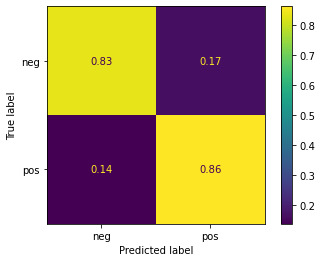

In [141]:
reviews_cm =plot_confusion_matrix(random_search, X_test, y_test, normalize = 'true')

In [142]:
t.test_3_4(reviews_cm)

'Success'

**Question 3.5** <br> {points: 3}

Print a classification report on the `X_test` predictions of the best model from `random_search` with measurements to 4 decimal places. Use this information to answer the following questions.

A) What is the recall if we classify `pos` as our "positive" class? Save the result to 4 decimal places in an object named `answer3_5a`. 

B) What is the precision weighted average? Save the result to 4 decimal places in an object named `answer3_5b`. 

C) What is the `f1` score using `pos` as your positive class? Save the result to 4 decimal places in an object named `answer3_5c`.

In [143]:
print(classification_report(y_test, random_search.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.86      0.83      0.85      5000
         pos       0.84      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [144]:
answer3_5a = 0.86
answer3_5b = 0.85
answer3_5c = 0.85

In [145]:
t.test_3_5_1(answer3_5a)

'Success'

In [146]:
t.test_3_5_2(answer3_5b)

'Success'

In [147]:
t.test_3_5_3(answer3_5c)

'Success'

**Question 3.6** <br> {points: 2}

Make a dataframe named `results_df` that contains these 5 columns: 

- `review` - this should contain the reviews from `X_test`.
- `true_label` - This should contain the true `y_test` values. 
- `predicted_y` - The predicted labels generated from `best_model` for the `X_test` reviews. 
- `neg_label_prob` - The negative probabilities generated from `best_model` for the `X_test` reviews. These can be found at index 0 of the `predict_proba` output (you can get that using `[:,0]`). 
-  `pos_label_prob` - The negative probabilities generated from `best_model` for the `X_test` reviews. These can be found at index 0 of the `predict_proba` output (you can get that using `[:,1]`). 

In [169]:
results_df = pd.DataFrame({'review' : X_test,
              'true_label' : y_test,
              'predicted_y' : best_model.predict(X_test),
              'neg_label_prob' : best_model.predict_proba(X_test)[:,0],
              'pos_label_prob' : best_model.predict_proba(X_test)[:,1]
             }
                         )
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10000 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          10000 non-null  object 
 1   true_label      10000 non-null  object 
 2   predicted_y     10000 non-null  object 
 3   neg_label_prob  10000 non-null  float64
 4   pos_label_prob  10000 non-null  float64
dtypes: float64(2), object(3)
memory usage: 726.8+ KB


In [170]:
t.test_3_6(results_df)

'Success'

**Question 3.7** <br> {points: 1}

Find the top 5 movie reviews in `results_df` with the highest predicted probability of being positive (i.e., where the model is most confident that the review is positive).

Save the reviews and the associated probability score in a dataframe named `most_pos_df`. 

In [193]:
most_pos_df = pd.DataFrame(results_df.sort_values(by= 'pos_label_prob', ascending = False).head(5))
most_pos_df

,review,true_label,predicted_y,neg_label_prob,pos_label_prob
19628,"Universal Studios version of ""Flipper"" (1996) ...",pos,pos,6.090454e-08,1.000000
15154,This is one of Bruce's most underrated films i...,pos,pos,1.515321e-07,1.000000
16447,1904. The North African nation of Morocco is h...,pos,pos,4.482124e-07,1.000000
18713,Many years ago I saw this movie (on television...,pos,pos,9.123248e-07,0.999999
18332,Ray Charles Robinson (Jamie Foxx) is a extreme...,pos,pos,1.783141e-06,0.999998


In [194]:
t.test_3_7(most_pos_df)

'Success'

Feel free to explore these reviews and see how positive they read!

Here is the first one for you (if you got the above question right)! 

In [198]:
most_pos_df.iloc[0,0]

'Universal Studios version of "Flipper" (1996) is a great heartwarming film for the entire family with good values and sentimentality. It is the story of Sandy Ricks, a teenager from Chicago who reluctantly spends his vacation with his Uncle Porter Ricks in the Bahamas. This ultimately changes the teenagers life and he grows up in the process. He learns to appreciate nature and to have a respect for the environment. I grew up in the 1960\'s and the NBC television show "Flipper" was my favorite childhood show. Elijah Wood is perfectly cast as a 1990\'s Sandy Ricks and gives an excellent performance. As much as I liked the NBC television show and MGM theatrical feature films with Luke Halpin as Sandy in the 1960\'s I liked this feature the best! I feel Elijah Wood is the best Sandy Ricks. With respect to Luke Halpin I feel Elijah Wood has more of a range of acting talent and emotes more as an actor which makes his performance excellent and more believable. I think Elijah Wood is the best

**Question 3.8** <br> {points: 1}

Using `best_model`, find the 5 movie reviews in the test set with the highest predicted probability of being negative (i.e., where the model is most confident that the review is negative).

Save the reviews and the associated probability score in a dataframe named `most_neg_df`. 

In [196]:
most_neg_df = pd.DataFrame(results_df.sort_values(by= 'neg_label_prob', ascending = False).head(5))
most_neg_df

,review,true_label,predicted_y,neg_label_prob,pos_label_prob
11992,"Plankton, or Creatures from the Abyss as I'm p...",neg,neg,1.0,3.701106e-09
11677,The review on the main page admits that the mo...,neg,neg,1.0,4.155311e-09
11793,Komodo vs. Cobra starts as 'One Planet' enviro...,neg,neg,1.0,8.946306e-09
11814,WEll first and for most I'd just like to say t...,neg,neg,1.0,1.654804e-08
14056,I don't understand jokes. I do believe this is...,neg,neg,1.0,3.595324e-08


In [197]:
t.test_3_8(most_neg_df)

'Success'

And what does a negative review read like?

In [199]:
most_neg_df.iloc[0,0]

"Plankton, or Creatures from the Abyss as I'm positive it's more commonly known as & filmed under as the title Creatures from the Abyss appears over a moving image & in the same font type as the rest of the credits, starts with five 20 something kids, Mike (Clay Rogers) his girlfriend Margaret (Sharon Twomey), sisters Julie (Ann Wolf) & Dorothy (Loren DePalm) & an annoying idiot named Bobby (Michael Bon) whom decide to all fit into a small rubber boat & head out to sea, don't ask why as I don't know. Oh & the complete idiot Bobby left the petrol behind & never thought to tell anyone so it comes as no great surprise that they end up stranded out at sea without any petrol for the motor & to make matters worse they become trapped in a thunder storm & discover a dead body floating in the water. Shortly after their luck seems to change when they come across a yacht & potential safety, in a flash everyone boards the yacht & begin to explore. First of all they find a scientific lab with vario

**Question 3.9 - Optional** <br> {points: 0}
This is an optional question!

(You'll get 0 marks for this one but you may have fun doing it?!) 

Using `best_model`, find the 5 movie reviews in the test set with the most divided probability of being negative or positive (i.e., where the model is least confident in either review sentiment).

Save the reviews and the associated probability score in a dataframe named `divided_revs_df`.

In [218]:
results_df['prob_diff'] = results_df['pos_label_prob'].sub(results_df['neg_label_prob']).abs()
divided_revs_df = pd.DataFrame(results_df.sort_values(by= 'prob_diff', ascending = False).head(5))

In [219]:
t.test_3_9(divided_revs_df)

'Success'

If you attempted this question, uncomment the code below and read a review that the model was uncertain on classifying.

In [220]:
print(divided_revs_df.iloc[0,0])

Plankton, or Creatures from the Abyss as I'm positive it's more commonly known as & filmed under as the title Creatures from the Abyss appears over a moving image & in the same font type as the rest of the credits, starts with five 20 something kids, Mike (Clay Rogers) his girlfriend Margaret (Sharon Twomey), sisters Julie (Ann Wolf) & Dorothy (Loren DePalm) & an annoying idiot named Bobby (Michael Bon) whom decide to all fit into a small rubber boat & head out to sea, don't ask why as I don't know. Oh & the complete idiot Bobby left the petrol behind & never thought to tell anyone so it comes as no great surprise that they end up stranded out at sea without any petrol for the motor & to make matters worse they become trapped in a thunder storm & discover a dead body floating in the water. Shortly after their luck seems to change when they come across a yacht & potential safety, in a flash everyone boards the yacht & begin to explore. First of all they find a scientific lab with variou

**Question 3.10 - Optional** <br> {points: 0}

Here is another optional question!

Examine a review from the test set where our `best_model` is making mistakes, i.e., where the true labels do not match the predicted labels. 

Save a (single) full row from `divided_revs_df` in an object named `wrong_review`. (We are expected a dataframe as the datatype for the autograder). 

In [221]:
wrong_review = results_df.query('true_label != predicted_y')

In [222]:
t.test_3_10(wrong_review)

'Success'

If you attempted this question, uncomment the code below and read the review below. Does it make sense as to why the model got it wrong?

In [223]:
wrong_review.iloc[0,0]

'I get the feeling a lot of people liked this movie (not all people, but a lot of them) because they don\'t want to admit they don\'t understand it. People of middling intelligence, if you will, who pretend to be ever so avant garde and trendy who think Lynch is a genius.<br /><br />Lynch, to me, is like Tarantino. They\'re both great, but neither one is the messiah as so many fanboys want to believe. No director can change the world, so chill out. And both make sucky flicks sometimes, it just happens. Everyone has a bad day. And clearly, since this movie was actually designed as a pilot first and then hack-jobbed into a feature film, it wasn\'t made with all the passion and forethought one should put into a movie. Face it, much of the movie is gibbering unintelligibility which cannot be understood. We can all make up meanings, Lynch may have his own view, but none of that matters. It was strewn about the screen incoherently. Admittedly, the first portion had the semblance of an intent

## Attributions
- The IMDB DataSet - [Kaggle](https://www.kaggle.com/utathya/imdb-review-dataset)

- MDS DSCI 571 - Supervised Learning I - [MDS's GitHub website](https://github.com/UBC-MDS/DSCI_571_sup-learn-1) 


## Before Submitting 

Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  